<a href="https://colab.research.google.com/github/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/blob/main/Taxi_fare_predictor_with_shap_xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install -U scikit-learn
!pip install shap
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import category_encoders as ce
import shap
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
trainDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-train.csv'
train_data = pd.read_csv(trainDataUrl)
train_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,CMT,1,1,1271,3.8,CRD,17.5
1,CMT,1,1,474,1.5,CRD,8.0
2,CMT,1,1,637,1.4,CRD,8.5
3,CMT,1,1,181,0.6,CSH,4.5
4,CMT,1,1,661,1.1,CRD,8.5


In [ ]:
testDataUrl = 'https://raw.githubusercontent.com/shifatzaman/Taxi-Fare-Prediction-With-SHAP-XAI/main/taxi-fare-test.csv'
test_data = pd.read_csv(testDataUrl)
test_data.head()

,vendor_id,rate_code,passenger_count,trip_time_in_secs,trip_distance,payment_type,fare_amount
0,VTS,1,1,1140,3.75,CRD,15.5
1,VTS,1,1,480,2.72,CRD,10.0
2,VTS,1,1,1680,7.80,CSH,26.5
3,VTS,1,1,600,4.73,CSH,14.5
4,VTS,1,1,600,2.18,CRD,9.5


In [ ]:
train_data.isna().sum() 

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

In [ ]:
train_data.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [ ]:
OHE = ce.OneHotEncoder(cols=['vendor_id',
                             'payment_type'],use_cat_names=True)

In [ ]:
# encode the categorical variables in train data
train_data = OHE.fit_transform(train_data)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [ ]:
train_X = train_data.drop(columns=['fare_amount'])
train_Y = train_data['fare_amount']

In [ ]:
test_data.isna().sum() 

vendor_id            0
rate_code            0
passenger_count      0
trip_time_in_secs    0
trip_distance        0
payment_type         0
fare_amount          0
dtype: int64

In [ ]:
test_data.dtypes

vendor_id             object
rate_code              int64
passenger_count        int64
trip_time_in_secs      int64
trip_distance        float64
payment_type          object
fare_amount          float64
dtype: object

In [ ]:
# encode the categorical variables in test data
test_data = OHE.fit_transform(test_data)

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


In [ ]:
test_X = test_data.drop(columns=['fare_amount'])
test_Y = test_data['fare_amount']

In [ ]:
model_LR = LinearRegression()

In [ ]:
# fit the model with the training data
model_LR.fit(train_X, train_Y)

LinearRegression()

In [ ]:
print("Score on training dataset- ", model_LR.score(train_X, train_Y))

Score on training dataset-  0.8751264185214683


In [ ]:
print("Score on test dataset- ", model_LR.score(test_X, test_Y))

Score on test dataset-  0.802221456889139


In [ ]:
predict_train = model_LR.predict(train_X)

In [ ]:
print('Mean absolute error on train data: ', mean_absolute_error(train_Y, predict_train))

Mean absolute error on train data:  0.8483768403392281


In [ ]:
print('Mean absolute error percentage on train data: ', mean_absolute_percentage_error(train_Y, predict_train) * 100)

Mean absolute error percentage on train data:  7.358908309404945


In [ ]:
predict_test = model_LR.predict(test_X)

In [ ]:
print('Mean absolute error on test data: ', mean_absolute_error(test_Y, predict_test))

Mean absolute error on test data:  0.8732104119874754


In [ ]:
print('Mean absolute error percentage on test data: ', mean_absolute_percentage_error(test_Y, predict_test) * 100)

Mean absolute error percentage on test data:  7.7218075216112885


In [ ]:
print("Model coefficients :\n")

for i in range(train_X.shape[1]):
    print(train_X.columns[i], "=", model_LR.coef_[i].round(4))

Model coefficients :

vendor_id_CMT = -0.0023
vendor_id_VTS = 0.0023
rate_code = 9.2646
passenger_count = -0.0072
trip_time_in_secs = 0.0065
trip_distance = 1.5728
payment_type_CRD = 1.5885
payment_type_CSH = 1.3651
payment_type_NOC = -3.2031
payment_type_DIS = -2.0214
payment_type_UNK = 2.2709


In [ ]:
rowNumberToTest = 20

testDataIndexForPrediction = rowNumberToTest -2

print("Predicted Fare: ", predict_test[testDataIndexForPrediction].round(2))
print("Actual Fare: ", test_Y.iloc[testDataIndexForPrediction])

Predicted Fare:  8.99
Actual Fare:  8.5


In [ ]:
X100 = shap.utils.sample(test_X, 100)

In [ ]:
explainer = shap.Explainer(model_LR.predict, X100)
shap_values = explainer(test_X.head(100))

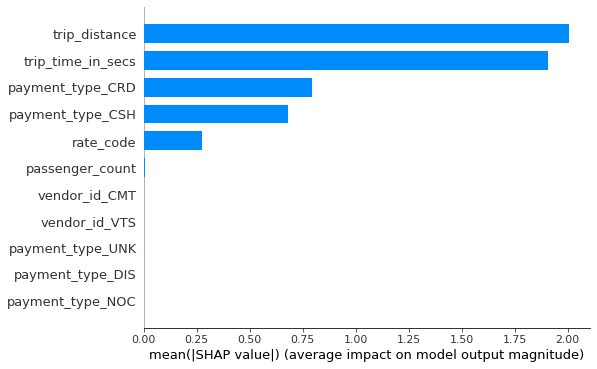

In [ ]:
shap.summary_plot(shap_values, test_X, feature_names=test_X.columns, plot_type="bar")

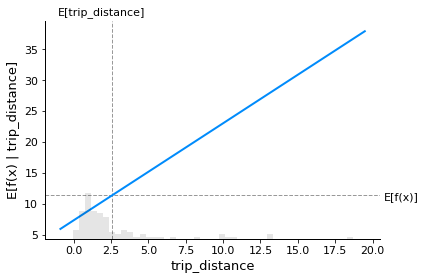

In [ ]:
shap.plots.partial_dependence(
    "trip_distance", model_LR.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

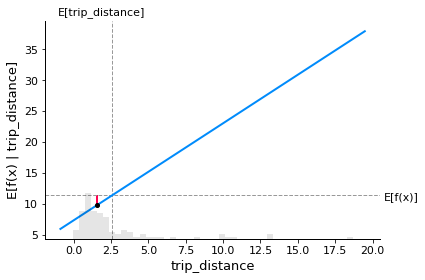

In [ ]:
shap.partial_dependence_plot(
    "trip_distance", model_LR.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[testDataIndexForPrediction:testDataIndexForPrediction+1,:]
)

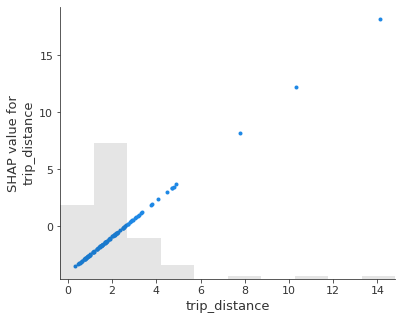

In [ ]:
shap.plots.scatter(shap_values[:,"trip_distance"])

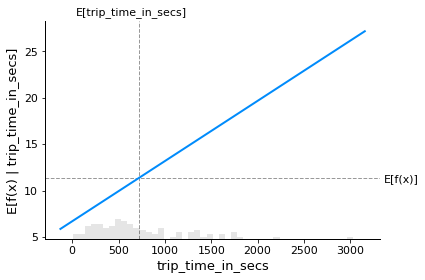

In [ ]:
shap.plots.partial_dependence(
    "trip_time_in_secs", model_LR.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

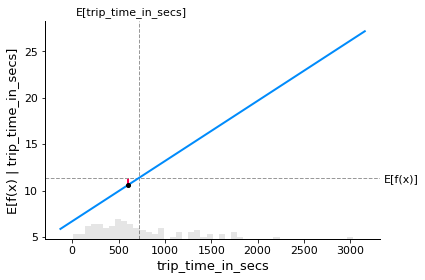

In [ ]:
shap.partial_dependence_plot(
    "trip_time_in_secs", model_LR.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[testDataIndexForPrediction:testDataIndexForPrediction+1,:]
)

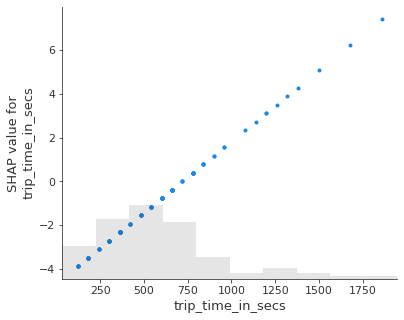

In [ ]:
shap.plots.scatter(shap_values[:,"trip_time_in_secs"])

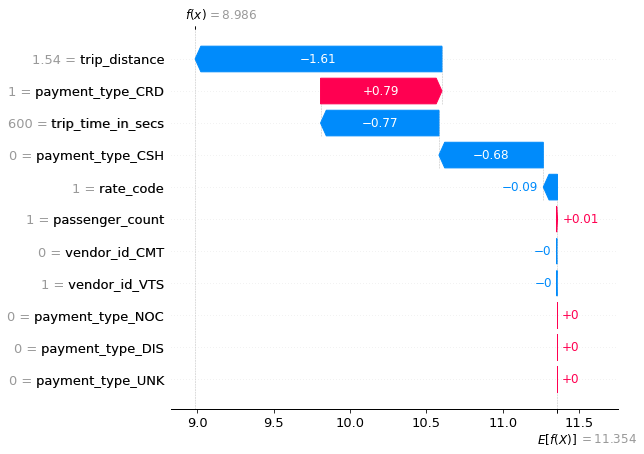

In [ ]:

shap.plots.waterfall(shap_values[testDataIndexForPrediction], max_display=14)